In [1]:
from tensorflow.keras.models import load_model, Model
from tensorflow.python.keras.datasets import cifar10, mnist
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

W0621 19:20:58.983628 140030734808896 __init__.py:316] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()

In [3]:
def show(image, resize=True, cmap=None, figsize=None):
    
    if resize is True:
        if len(image.shape) == 3 and image.shape[2] == 3:
            image = image.reshape(image.shape[0],image.shape[1], image.shape[2])
        elif len(image.shape) == 3 and image.shape[2] == 1:
            image = image.reshape(image.shape[0],image.shape[1])
    
    if figsize is not None:
        plt.figure(figsize=figsize)
    
    
    if cmap is not None:
        cmap=cmap
    else:
        cmap="gray"
    
    plt.imshow(image, cmap=cmap)
    
def return_random_image(image_list):
    r = random.randint(0, len(image_list)-1)
    print(r)
    return image_list[r], r

In [4]:
from sklearn.neighbors import NearestNeighbors

In [5]:
nb = NearestNeighbors(5,metric='euclidean')

In [6]:
autoencoder_model = load_model("autoencoder_color.h5")

W0621 19:20:59.502875 140030734808896 deprecation.py:506] From /home/stefanini/.virtualenvs/deep/lib/python3.7/site-packages/tensorflow_core/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0621 19:20:59.503562 140030734808896 deprecation.py:506] From /home/stefanini/.virtualenvs/deep/lib/python3.7/site-packages/tensorflow_core/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0621 19:20:59.512821 140030734808896 deprecation.py:506] From /home/stefanini/.virtualenvs/deep/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_varia

In [8]:
encoder = Model(inputs=autoencoder_model.input, outputs=autoencoder_model.get_layer("conv2d_5").output)
predicted = encoder.predict(x_test)

In [9]:
predicted = predicted.reshape(predicted.shape[0], predicted.shape[1] * predicted.shape[2] * predicted.shape[3])

In [10]:
predicted.shape

(10000, 512)

In [11]:
nb.fit(predicted)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

35766


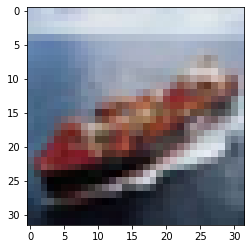

In [12]:
image, index = return_random_image(x_train)
show(image)

In [13]:
image.shape

(32, 32, 3)

In [14]:
query = image.reshape(1,32,32,3)
query = encoder.predict(query)
query = query.reshape(1,query.shape[1]*query.shape[2]*query.shape[3])
distancias, indexes = nb.kneighbors(query)

distancias = distancias[0]
indexes = indexes[0]

In [15]:
distancias

array([22345.32389742, 22422.85696093, 22511.92933129, 22690.1785564 ,
       23557.69191998])

In [16]:
indexes

array([5142, 7146, 8223,  213, 6552])

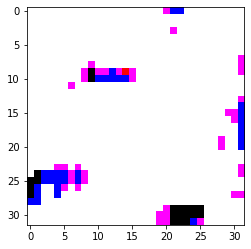

In [17]:
plt.imshow(autoencoder_model.predict(x_test)[8372])

22345.32389742427
(32, 32, 3)


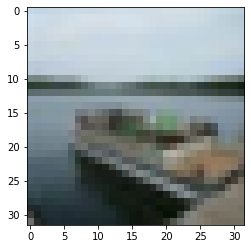

22422.85696092617
(32, 32, 3)


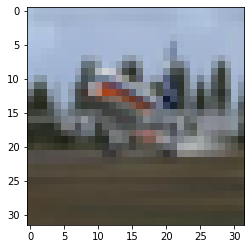

22511.92933128997
(32, 32, 3)


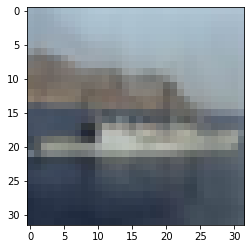

22690.178556397503
(32, 32, 3)


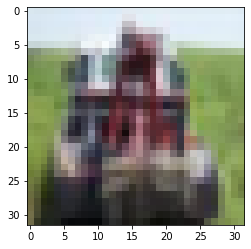

23557.691919977064
(32, 32, 3)


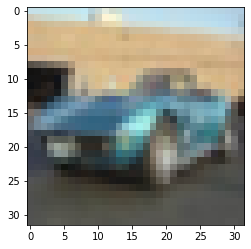

In [20]:
for dist, i in zip(distancias,indexes):
#     fig, ax = plt.subplots(1,2)
    
    image = x_test[i]
    
    plt.imshow(image)
    print(dist)
    print(image.shape)
#     reconstructed_image = autoencoder_model.predict(image.reshape(1,32,32,3))
#     print(reconstructed_image.shape)
#     ax[1].imshow(reconstructed_image.reshape(32,32,3))
    
    plt.show()